# setup

/usr/lib/python3.6/site-packages/holoviews-1.9.2-py3.6.egg/holoviews/plotting/mpl/__init__.py:30: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()



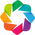

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
hv.extension('bokeh','matplotlib')

In [2]:
%%output backend='matplotlib'
%opts Overlay [legend_position='bottom']
%opts Points.R (color='r') Points.XY (color='blue') Points.XZ (color='green' size=5)

In [3]:
%%output backend='bokeh'
%opts Overlay [legend_position='bottom']
%opts Points.R (color='r') Points.XY (color='blue') Points.XZ (color='green' size=5)

In [4]:
def mk_vector(): return np.random.normal(size=100)
df = pd.DataFrame( dict( x = mk_vector(), y=mk_vector(), z=mk_vector()))
for i in range(5): df[str(i)] = mk_vector()

df.tail().round(2)

,x,y,z,0,1,2,3,4
95,1.55,-2.00,1.00,-0.99,-0.73,1.84,-0.07,-0.36
96,0.24,-0.44,1.16,-0.38,0.21,-2.23,-0.82,-0.51
97,-0.19,1.51,-0.99,1.84,-1.38,0.03,0.61,0.41
98,-1.77,-2.73,-0.14,-0.56,-0.52,-0.29,1.44,-0.33
99,0.28,-0.12,-2.11,0.52,-0.77,-0.51,-0.25,1.65


# example 1

In [ ]:
import logging

def mk_view_1(use_z=True):
    h = hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
        #logging.info('z')
    return h

# in the following, use_z is initialized to 0 - which python interprets as False
dmap_1=hv.DynamicMap(mk_view_1, kdims=['use_z']).redim.values(use_z=[True,False])
dmap_1

In [ ]:
# This initializes use_z correctly, but changing the setting no longer works
hv.HoloMap(dmap_1)

In [ ]:
%%output backend='matplotlib'
# in this example, use_z is initialized to 0, selector can be changed once, has no effect thereafter
plt_dmap_1=hv.DynamicMap(mk_view_1, kdims=['use_z']).redim.values(use_z=[True,False])
plt_dmap_1

# example 2

In [ ]:
%%opts Distribution {+framewise}

def mk_view_2(i, use_z=True):
    h = hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
        #logging.info('z')

    return (h+hv.Distribution( df[str(i)])).relabel('CURRENT i=%d'%i)

#use_z is correctly initialized to true, this example works as expected
#However, the title returned by mk_view_2 stays fixed!
dmap_2=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
dmap_2

In [ ]:
%%opts Distribution {+framewise}
# this fails: selectors do not work, trying to change i changes the use_z selector
hv.HoloMap(dmap_2)

In [ ]:
%%opts Distribution {+framewise}
# this fails too:
#  AttributeError: 'NoneType' object has no attribute 'clone'

dmap_3=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
hv.HoloMap(dmap_3).collate()

In [ ]:
%%output backend='matplotlib'

# This produces an error:
# Exception: Some Elements returned by the dynamic callback were not initialized correctly and could not be rendered.
plt_dmap_2=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
plt_dmap_2

# example 3

In [5]:
def mk_view_3(i,sigma,unused,use_z=True):
    h=\
    hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
    hv.Points( (df['1'],sigma*df['2']),  group='R', label='random')*\
    hv.Points( df, kdims=[str(i),str(i)],group='XZ', label='diagonal')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
    return h
dmap_3 = hv.DynamicMap( mk_view_3, kdims=['i','sigma','unused','use_z'])\
          .redim.values(i=np.arange(5),sigma=[2.,3.5,5.], unused=[3,4,5], use_z=[True,False])

# this just produces a text representation:   :HoloMap   [i,sigma,unused,use_z]
hv.HoloMap(dmap_3)

:HoloMap   [i,sigma,unused,use_z]

In [ ]:
%%output backend='matplotlib'
plt_dmap_3 = hv.DynamicMap( mk_view_3, kdims=['i','sigma','unused','use_z'])\
          .redim.values(i=np.arange(5),sigma=[2.,3.5,5.], unused=[3,4,5], use_z=[True,False])
# this just produces a text representation:   :HoloMap   [i,sigma,unused,use_z]
hv.HoloMap(plt_dmap_3)

# example 4

In [ ]:
%%opts Histogram Distribution [invert_axes=True] {+framewise}
def mk_view_4(i,unused):
    h=\
    hv.Histogram(np.histogram(df[str(i)],normed=True),label='hist')*\
    hv.Distribution( df[str(i)], group='XY', label='xy')
    return h

dmap_4 = hv.DynamicMap( mk_view_4, kdims=['i','unused'])\
          .redim.values(i=np.arange(5), unused=[3,4,5])

if True:
    dmap = dmap_4
    # no legend for Distribution
    # would be nice to be able to change hist alpha by clicking on hist legend
else:
    dmap = dmap_4 + hv.HoloMap(dmap_4)
    # This does not work
    # interestingly, this displays the plot without inverting axes,
    # then redisplays it a little later in time with inverted axes
dmap

In [ ]:
# this displays, but the selector for i has no effect
hv.HoloMap(dmap_4)

In [ ]:
%%output backend='matplotlib'
plt_dmap_4 = hv.DynamicMap( mk_view_4, kdims=['i','unused'])\
          .redim.values(i=np.arange(5), unused=[3,4,5])

# plt_dmap_4 by itself works as expected
#    but this layout does not
plt_dmap_4 + hv.HoloMap(plt_dmap_4)

I have a weird case with actual data I can't yet reproduce:
> for one of the cases (i = 2), the inverted_axis=2 plot produces a vertical line,
yet when called directly, I get the expected Histogram... I'll try and see about reducing the data to a minimum

# example 5

In [ ]:
%%opts Histogram Distribution [invert_axes=True width=200 yaxis=None] {+framewise}
%%opts Path (color='indianred', line_width=4)
%%opts DynamicMap [width=700]
#      ^^^^^^^^^^             seems to be honored, but produces a warning
def mk_view_5(i,unused):
    points = \
        hv.Points( df, kdims=['x', 'y'], group='XY', label='xy') *\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    lines  = hv.Path([ [(-1, -1), (2,2), (-1,3), (3,-1), (3,2)] ],label='path')
    #                                                             ^^^^^^^^^^^^  legend not honored
    
    hist = hv.Histogram(np.histogram(df[str(i)],normed=True))*\
           hv.Distribution( df[str(i)], group='XY')

    return points*lines+hist
    #return points << hist  # does not work by itself

dmap_5 = hv.DynamicMap( mk_view_5, kdims=['i','unused'])\
          .redim.values(i=np.arange(5),unused=[0])
dmap_5

In [ ]:
%%output backend='matplotlib' size=100
%%opts Histogram Distribution [invert_axes=True width=200 yaxis=None] {+framewise}
%%opts Path (color='indianred', line_width=4)

# with matplotlib, the smae graph works without any warnings!

plt_dmap_5 = hv.DynamicMap( mk_view_5, kdims=['i','unused'])\
          .redim.values(i=np.arange(5),unused=[0])
plt_dmap_5

# example 6

In [6]:
%%opts Contours [width=800 colorbar=True colorbar_position='left']
%%opts Image (cmap='Blues_r')
vals=np.linspace(-10,10, 200); xx,yy=np.meshgrid(vals,vals)
img=hv.Image(xx*yy)
img*hv.operation.contours(img)
# why did this generate legends?  hv.operation.contours(img) does not
# why are the legends not clickable individually, why does clicking them have no effect?

:Overlay
   .Image.I    :Image   [x,y]   (z)
   .Contours.I :Contours   [x,y]   (z)

:Overlay
   .Image.I    :Image   [x,y]   (z)
   .Contours.I :Contours   [x,y]   (z)
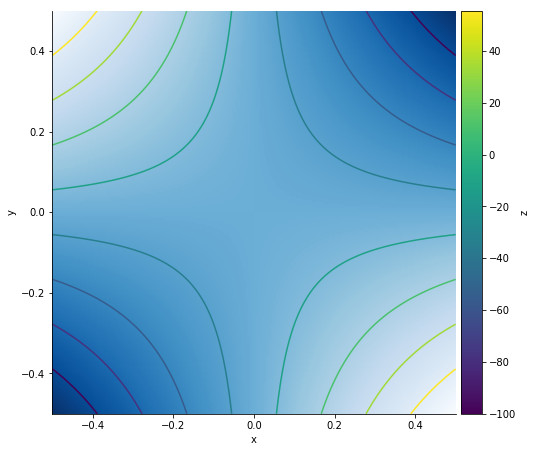

In [7]:
%%output backend='matplotlib' size=200
%%opts Contours [width=800 colorbar=True colorbar_position='left']
%%opts Image (cmap='Blues_r')
vals=np.linspace(-10,10, 200); xx,yy=np.meshgrid(vals,vals)
img=hv.Image(xx*yy)
img*hv.operation.contours(img)

# no legends here, but the colorbar_position is not honored

# example 7

In [8]:
# %%opts Points [width=500 tools=['hover']] (size=5 color=Cycle('Blues'))

# cannot get points to honor the color!

import seaborn as sns
iris            = sns.load_dataset("iris")
iris['species'] = iris['species'].astype('category')

def strip_plot(df,x,y,jitter=.2):
    ticks = [(i,v) for i,v in enumerate(df[x].cat.categories)]
    return hv.Points(np.array([df[x].cat.codes+np.random.uniform(-jitter,jitter,size=df.shape[0]), df[y], df[x].cat.codes.astype(float)]).T, kdims=[x,y])\
             .opts(plot=dict(xticks=ticks, color_index=x), style=dict(size=5,color=hv.Cycle('Blues')))

strip_plot( iris, 'species', 'sepal_length').redim.range(species=(-.5,2.5),sepal_length=(4,8.5))

:Points   [species,sepal_length]

:Points   [species,sepal_length]
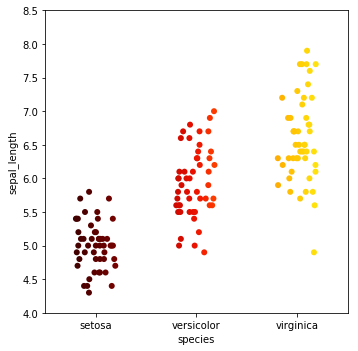

In [10]:
%%output backend='matplotlib' size=150

def strip_plot(df,x,y,jitter=.2):
    ticks = [(i,v) for i,v in enumerate(df[x].cat.categories)]
    return hv.Points(np.array([df[x].cat.codes+np.random.uniform(-jitter,jitter,size=df.shape[0]), df[y], df[x].cat.codes.astype(float)]).T, kdims=[x,y])\
             .opts(plot=dict(xticks=ticks, color_index=x), style=dict(size=5,color=hv.Cycle('Blues')))

strip_plot( iris, 'species', 'sepal_length').redim.range(species=(-.5,2.5),sepal_length=(4,8.5))

# this seems to work apart from the color cycle selection

In [11]:
# BoxWhisker does not accept ticks lists: the x axis ticks are the cat.codes rather than the cat.names

def boxwhisker_plot(df,x,y,jitter=.2):
    ticks = [(i,v) for i,v in enumerate(df[x].cat.categories)]
    return hv.BoxWhisker(np.array([df[x].cat.codes, df[y]]).T, x,y)\
             .opts(plot=dict(xticks=ticks))
boxwhisker_plot( iris, 'species', 'sepal_length').redim.range(species=(-.5,2.5),sepal_length=(4,8.5))

:BoxWhisker   [species]   (sepal_length)

:BoxWhisker   [species]   (sepal_length)
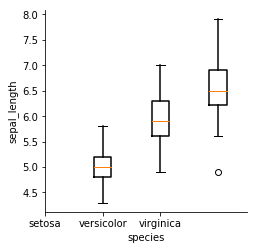

In [12]:
%%output backend='matplotlib'

def boxwhisker_plot(df,x,y,jitter=.2):
    ticks = [(i,v) for i,v in enumerate(df[x].cat.categories)]
    return hv.BoxWhisker(np.array([df[x].cat.codes, df[y]]).T, x,y)\
             .opts(plot=dict(xticks=ticks, color_index=x))
boxwhisker_plot( iris, 'species', 'sepal_length').redim.range(species=(-.5,2.5),sepal_length=(4,8.5))

# here, the x axis is messed up

# example 8

In [ ]:
%%opts Bivariate [bandwidth=0.5] (cmap='Blues') Points (s=4)
from bokeh.sampledata.iris import flowers
from holoviews.operation import gridmatrix

if False:
    #gridmatrix cannot handle categorical entries
    flowers['species'] = flowers['species'].astype('category')
elif False:
    # yields: 'Image dimension petal_length is not evenly sampled, please use the QuadMesh' error message
    flowers['species'] =100.* (flowers['species'].astype('category').cat.codes+1).astype(float)


iris_ds = hv.Dataset(flowers)

density_grid = gridmatrix(iris_ds, diagonal_type=hv.Distribution, chart_type=hv.Bivariate)
point_grid   = gridmatrix(iris_ds, diagonal_type=hv.Distribution, chart_type=hv.Points   )
point_grid   = point_grid.map(lambda x: hv.Overlay(), hv.Distribution)

density_grid * point_grid

# example 9

In [63]:
%%opts Overlay [width=100 height=100] Table [height=480 width=640]
%%opts Points (color=Cycle(['#ff0000','#00ff00','#0000ff']))

iris = flowers
def gen_grid_func(df,v):
    color_index = 'species'
    cols        = [i for i in df.columns if i != v]
    if False:
        df = df.copy()
        df['color'] = (df[v].astype('category').cat.codes+1).astype(float)
        color_index='color'
        # using color_index='color' below results in a 'singular matrix' error

    N = df.shape[1]
    def top(i,j):
        #print(df.columns[i],df.columns[j])
        h = \
        hv.Bivariate(df, kdims=[df.columns[i],df.columns[j]])*\
        hv.Points   (df, kdims=[df.columns[i],df.columns[j]]).opts(plot=dict(color_index=color_index))
        return h
    def diag(i):
        s = df[v].unique()
        h = hv.Overlay([ hv.Distribution( df[df['species']==j], df.columns[i]) for j in s])
        return h
    def btm(i,j):
        h = \
        hv.Overlay([hv.Points   (df, kdims=[df.columns[i],df.columns[j]])])
        return h

    plots  = {(i,j): top(i,j) for i in range(N) for j in range(i+1,N) if df.columns[i] in cols and df.columns[j] in cols}
    dplots = {(i,i): diag(i ) for i in range(N) if df.columns[i] != v }
    bplots = {(i,j): btm(i,j) for i in range(N) for j in range(i) if df.columns[i] in cols and df.columns[j] in cols}

    plots.update(dplots)
    plots.update(bplots)
    
    return plots

# GridMatrix does not honor xticks, yticks
# can't figure out how to control point colors: should be the same as the colors of the distributions.
#    point set 0 has alpha=0?
# Want a legend for the species columns (ideally with mute_alpha in effect!)
ticks = [i for i in iris.columns if i != 'species']
h=\
hv.GridSpace(gen_grid_func(iris, 'species'), kdims=['measurement','measurement']).opts( plot=dict(xticks=ticks, yticks=ticks)).relabel('Measurements by species')
h  + hv.Table(iris)  # why is the bokeh toolbar extending to the right beyond the table?

:Layout
   .GridSpace.Measurements_by_species :GridSpace   [measurement,measurement]
      :Overlay
         .Distribution.I   :Distribution   [petal_width]   (Density)
         .Distribution.II  :Distribution   [petal_width]   (Density)
         .Distribution.III :Distribution   [petal_width]   (Density)
   .Table.I                           :Table   [sepal_length,sepal_width,petal_length,petal_width,species]

# example 10

In [87]:
%%opts ErrorBars [invert_axes=True show_grid=True  width=600 height=200] (color='slateblue')
%%opts Scatter   [invert_axes=True tools=['hover'] toolbar='above'] (color='slateblue' marker='+' size=10 line_width=3)
%%opts Table     [height=180]
df1 = pd.DataFrame( 
        {'mean'       : [2.0, 4.0, 6.0,   8.0 ],
         'hpd_2.5'    : [0.0, 2.0, 4.0,   6.0 ],
         'hpd_97.5'   : [3.0, 5.0, 7.0,   9.0 ],
         'sd'         : [0.5, 0.5, 0.5,   0.5 ],}, index=['alpha', 'beta_0', 'beta_1', 'sigma']
)

from io import StringIO
df2 = pd.read_csv(StringIO(
''',mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,  -14.4, 7.0, 0.2, -29.3, -0.6
beta_0,   9.2, 2.5, 0.1,   4.4, 14.0
beta_1, -11.5, 3.8, 0.2, -18.4, -4.1
sigma,   -1.5, 2.1, 0.1,  -8.1,  3.1
'''),index_col=0)

    
def forest_plot(df):
    rng = (np.floor(df['hpd_2.5'].min()), np.ceil(df['hpd_97.5'].max()) )

    e_u = df['hpd_97.5']- df['mean']
    e_l = df['mean']   - df['hpd_2.5']

    # Use invisible (i.e., alpha=0) markers to enable hover information
    h = \
        hv.ErrorBars( [i for i in zip(df.index,  df['mean' ], e_l, e_u)],
                    kdims=['parameter'], vdims=['value','e_l','e_u']).opts(style=dict(line_width=1) ) \
      * hv.ErrorBars( zip(df.index,  df['mean' ], df['sd' ] ),
                    kdims=['parameter'], vdims=['value','sd' ]).opts(style=dict(line_width=5, lower_head=None, upper_head=None) ) \
      * hv.Scatter( zip(df.index,  df['mean'   ]) ) \
      * hv.Scatter( zip(df.index,  df['hpd_2.5']) ).opts(style=dict(alpha=0)) \
      * hv.Scatter( zip(df.index,  df['hpd_97.5']) ).opts(style=dict(alpha=0))

    return h.redim.range(value=rng).relabel('95% Credible Intervals')

(hv.Table(df1)+hv.Table(df2)+forest_plot(df1)+forest_plot(df2)).cols(2)
# what happened to the Scatter plots for df2?

:Layout
   .Table.I                                    :Table   [hpd_2.5,hpd_97.5,mean,sd]
   .Table.II                                   :Table   [mean,sd,mc_error,hpd_2.5,hpd_97.5]
   .Overlay.A_95_percent_Credible_Intervals.I  :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)
   .Overlay.A_95_percent_Credible_Intervals.II :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)

In [54]:
%%opts ErrorBars [invert_axes=False show_grid=True  width=600 height=200] (color='slateblue')
%%opts Scatter   [tools=['hover'] toolbar='above'] (color='slateblue' marker='+' size=10 line_width=3)
forest_plot(df1)+forest_plot(df2)
# they do show up if invert_axes=False

:Layout
   .Overlay.A_95_percent_Credible_Intervals.I  :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)
   .Overlay.A_95_percent_Credible_Intervals.II :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)

:Layout
   .Overlay.A_95_percent_Credible_Intervals.I  :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)
   .Overlay.A_95_percent_Credible_Intervals.II :Overlay
      .ErrorBars.I  :ErrorBars   [parameter]   (value,e_l,e_u)
      .ErrorBars.II :ErrorBars   [parameter]   (value,sd)
      .Scatter.I    :Scatter   [x]   (y)
      .Scatter.II   :Scatter   [x]   (y)
      .Scatter.III  :Scatter   [x]   (y)
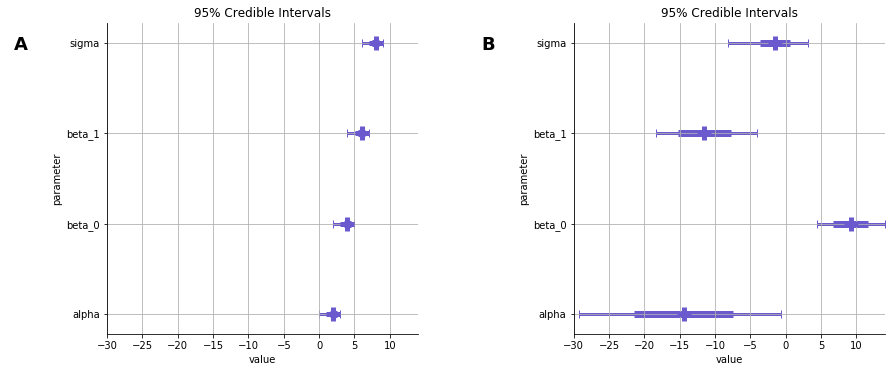

In [84]:
%%output backend='matplotlib' size=150
%%opts ErrorBars [invert_axes=True show_grid=True  width=600 height=200 ] (ecolor='slateblue' barsabove=True)
%%opts Scatter   [tools=['hover'] toolbar='above'] (color='slateblue' marker='+' s=200 linewidth=5)

def forest_plot(df):
    rng = (np.floor(df['hpd_2.5'].min()), np.ceil(df['hpd_97.5'].max()) )

    e_u = df['hpd_97.5']- df['mean']
    e_l = df['mean']   - df['hpd_2.5']

    # Use invisible (i.e., alpha=0) markers to enable hover information
    h = \
        hv.ErrorBars( [i for i in zip(df.index,  df['mean' ], e_l, e_u)],
                    kdims=['parameter'], vdims=['value','e_l','e_u']).opts(style=dict(elinewidth=3, capsize=4) ) \
      * hv.ErrorBars( zip(df.index,  df['mean' ], df['sd' ] ),
                    kdims=['parameter'], vdims=['value','sd' ]).opts(style=dict(elinewidth=7) ) \
      * hv.Scatter( zip(df.index,  df['mean'   ]) ) \
      * hv.Scatter( zip(df.index,  df['hpd_2.5']) ).opts(style=dict(alpha=0)) \
      * hv.Scatter( zip(df.index,  df['hpd_97.5']) ).opts(style=dict(alpha=0))

    return h.redim.range(value=rng).relabel('95% Credible Intervals')

# they do show up in matplotlib, as well
#     and grumble about the differences in option names....

forest_plot(df1)+forest_plot(df2)

# example 11

In [20]:
%%opts Overlay Div [width=380 height=180]
%%opts HeatMap [colorbar=True colorbar_position='left'] (cmap='Blues')
%%opts Text (color='lightgreen')

import seaborn as sns
iris = sns.load_dataset("iris")

corr = iris[iris['species'] != 'virginica'].corr().abs().round(2)
vals   = np.linspace(1,4,4)
m_corr = corr.as_matrix().copy()
m_corr.T[np.triu_indices(4,1)]=np.NaN

# Feature Request?  HeatMap enforces different dimension names: species/Species
#                   HeatMap does not allow overriding xticks
#                   Image does not allow overriding xticks either...

#                   If I pass vals=corr.columns, hv.Text(1,2,'s') treats 1,2 as new classes
#                                                hv.Text('petal_width','petal_width', 's) fails...

img  = hv.HeatMap((vals,vals,m_corr.T[::-1]), ['species','Species']) .opts(plot=dict(xticks=corr.columns))
img*hv.Overlay([hv.Text(i+1,j+1, '%.2f'%m_corr[i,3-j]) for j in range(4) for i in range(4-j)])+\
hv.Div( corr.to_html())

:Layout
   .Overlay.I :Overlay
      .HeatMap.I :HeatMap   [species,Species]   (z)
      .Text.I    :Text   [x,y]
      .Text.II   :Text   [x,y]
      .Text.III  :Text   [x,y]
      .Text.IV   :Text   [x,y]
      .Text.V    :Text   [x,y]
      .Text.VI   :Text   [x,y]
      .Text.VII  :Text   [x,y]
      .Text.VIII :Text   [x,y]
      .Text.IX   :Text   [x,y]
      .Text.X    :Text   [x,y]
   .Div.I     :Div

:Overlay
   .HeatMap.I :HeatMap   [species,Species]   (z)
   .Text.I    :Text   [x,y]
   .Text.II   :Text   [x,y]
   .Text.III  :Text   [x,y]
   .Text.IV   :Text   [x,y]
   .Text.V    :Text   [x,y]
   .Text.VI   :Text   [x,y]
   .Text.VII  :Text   [x,y]
   .Text.VIII :Text   [x,y]
   .Text.IX   :Text   [x,y]
   .Text.X    :Text   [x,y]
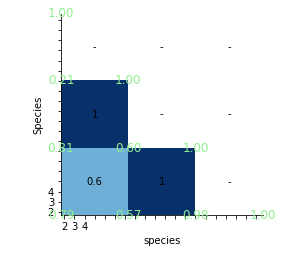

In [22]:
%%output backend='matplotlib'
%%opts Overlay [width=350 height=200]
%%opts HeatMap  (cmap='Blues')
%%opts Text (color='lightgreen')
img  = hv.HeatMap((vals,vals,m_corr.T[::-1]), ['species','Species'])  #.opts(plot=dict(xticks=corr.columns))
img*hv.Overlay([hv.Text(i+1,j+1, '%.2f'%m_corr[i,3-j]) for j in range(4) for i in range(4-j)])
# Hmmmmmmm

:HeatMap   [species,Species]   (z)
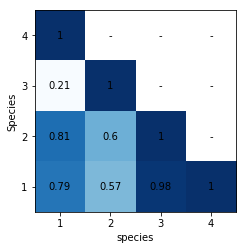

In [21]:
%%output backend='matplotlib'
%%opts Overlay [width=350 height=200]
%%opts HeatMap  (cmap='Blues')
%%opts Text (color='lightgreen')
hv.HeatMap((vals,vals,m_corr.T[::-1]), ['species','Species'])
# Huh The txt overlay messed up the axes????

In [44]:
%%opts Overlay [width=350 height=200]
%%opts HeatMap  (cmap='Blues')
%%opts Text (color='lightgreen')
hv.HeatMap(m_corr, ['species','Species'])
# Huh????

ValueError: cannot reshape array of size 2 into shape (3,2)

# example 12

In [5]:
%%opts Path (alpha=.5 color='black' line_dash='dotted')
%%opts Path.AXIS (color='darkgreen' alpha=1 line_width=2 line_dash='solid')
%%opts Scatter (size=5 alpha=.3) Scatter.A (color='blue') Scatter.B (alpha=0.6 color='indianred')
%%opts Overlay [width=250 height=250]
def apply_covariance_matrix_to_data(covx = np.array([[1,0.8],[0.8,2]]), u = np.random.uniform(-1, 1, (2, 500))  ):
    N    = u.shape[1]
    rng  = dict(x=(u[0,:].min(), u[0,:].max()), y=(u[1,:].min(), u[1,:].max()))
    
    y = covx @ u                                # apply the covariance matrix as a linear transform
    p = [np.stack([u[:,i],y[:,i]]) for i in range(0,y.shape[1],10)]

    # compute the singular vectors of the covariance matrix
    #    and find the axes
    origin = y.mean(axis=1)
    e1, v1 = np.linalg.eig(covx)
    v1[:,0] *= 5*e1[0]; v1[:,1] *= 5*e1[1]
    a = [np.stack([v1[:,i], origin]) for i in range(2)]

    return (hv.Path(p)*hv.Path(a, group='AXIS')*hv.Scatter(u.T, group='A')*hv.Scatter(y.T, group='B'))\
           .redim.range(**rng)

theta = np.linspace(0, 2*np.pi, 500)
h=\
apply_covariance_matrix_to_data()+\
apply_covariance_matrix_to_data(u = np.stack( [np.cos(theta), np.sin(theta)]))
h.relabel('Covariance Matrix as a linear transform').redim.range(x=(-2.5,2.5),y=(-2.5,2.5))

:Layout
   .Overlay.I  :Overlay
      .Path.I :Path   [x,y]
      .AXIS.I :Path   [x,y]
      .A.I    :Scatter   [x]   (y)
      .B.I    :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Path.I :Path   [x,y]
      .AXIS.I :Path   [x,y]
      .A.I    :Scatter   [x]   (y)
      .B.I    :Scatter   [x]   (y)

In [6]:
# what happened to the styling?
h

:Layout
   .Overlay.I  :Overlay
      .Path.I :Path   [x,y]
      .AXIS.I :Path   [x,y]
      .A.I    :Scatter   [x]   (y)
      .B.I    :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Path.I :Path   [x,y]
      .AXIS.I :Path   [x,y]
      .A.I    :Scatter   [x]   (y)
      .B.I    :Scatter   [x]   (y)

# example 13

In [5]:
%%opts ErrorBars [width=400 height=600 invert_axes=True yticks=yticks ] (line_color='slateblue' lower_head=None upper_head=None)

# First and last ytick appear as numerical values rather than strings

yticks=[ (0.0, 'ID'),
         (0.02040816326530612, 'NJ'), (0.04081632653061224,'MN'), (0.061224489795918366, 'ND'),
         (0.08163265306122448, 'CT'), (0.1020408163265306, 'UT'), (0.12244897959183673,  'NE'),
         (0.14285714285714285, 'SC'), (0.16326530612244897,'WI'), (0.18367346938775508,  'PA'),
         (0.2040816326530612,  'NY'), (0.22448979591836732,'CA'), (0.24489795918367346,  'FL'),
         (0.26530612244897955, 'MT'), (0.2857142857142857, 'IL'), (0.3061224489795918,   'WY'),
         (0.32653061224489793, 'MO'), (0.3469387755102041, 'HI'), (0.36734693877551017,  'VA'),
         (0.3877551020408163,  'TX'), (0.4081632653061224, 'MI'), (0.42857142857142855,  'DE'),
         (0.44897959183673464, 'DC'), (0.4693877551020408, 'NC'), (0.4897959183673469,   'OH'),
         (0.5102040816326531,  'IA'), (0.5306122448979591, 'KS'), (0.5510204081632653,   'MD'),
         (0.5714285714285714,  'MA'), (0.5918367346938775, 'WA'), (0.6122448979591836,   'NM'),
         (0.6326530612244897,  'WV'), (0.6530612244897959, 'VT'), (0.673469387755102,    'OR'),
         (0.6938775510204082,  'SD'), (0.7142857142857142, 'AZ'), (0.7346938775510203,   'TN'),
         (0.7551020408163265,  'NH'), (0.7755102040816326, 'IN'), (0.7959183673469387,   'MS'),
         (0.8163265306122448,  'LA'), (0.836734693877551,  'RI'), (0.8571428571428571,   'CO'),
         (0.8775510204081632,  'GA'), (0.8979591836734693, 'OK'), (0.9183673469387754,   'KY'),
         (0.9387755102040816,  'AK'), (0.9591836734693877, 'AL'), (0.9795918367346939,   'AR'),
         (1.0, 'ME')]

data = (
 np.array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 np.array([-4.38200978, -2.28187684, -2.22798073, -2.15924069, -1.69731109,
       -1.66836895, -1.49977227, -1.34683278, -1.26624425, -1.2001391 ,
       -1.08571591, -1.05366837, -0.98257495, -0.96501079, -0.91232407,
       -0.72111585, -0.65192939, -0.47504178, -0.46884986, -0.41837155,
       -0.29882139, -0.20403261, -0.18428986, -0.10327432, -0.07599212,
       -0.03803579,  0.02078841,  0.17117673,  0.17195909,  0.20955432,
        0.28689356,  0.3240377 ,  0.54876873,  0.61849   ,  0.79680994,
        0.88364427,  0.9133934 ,  0.96834871,  0.97722995,  1.15115139,
        1.18356002,  1.47546114,  1.69745361,  1.73229934,  1.73501903,
        1.84370194,  2.22784641,  2.32955558,  2.42933264,  3.40369997]),
 np.array([0.58004654, 0.77546848, 0.55096558, 0.88299432, 0.44458719,
        0.66819852, 0.76041589, 0.76890879, 1.49172919, 0.60598565,
        0.56333368, 1.11130121, 1.16541973, 0.53612363, 0.48676481,
        0.51586677, 0.54494741, 0.57077888, 0.45602756, 0.97516434,
        0.64486194, 1.01967916, 0.56309941, 0.8735182 , 0.41841549,
        0.53740329, 0.66735027, 0.58893196, 0.54627256, 0.81147552,
        0.39036651, 0.95485441, 0.44286027, 0.93777007, 0.60544969,
        0.72565077, 0.42034183, 0.7428953 , 0.93043359, 0.50103738,
        0.51158856, 0.66183206, 0.49033868, 1.2042867 , 0.57208299,
        0.57753521, 0.42049483, 0.63635629, 0.65774171, 1.25852429]),
 np.array([0.58004654, 0.77546848, 0.55096558, 0.88299432, 0.44458719,
        0.66819852, 0.76041589, 0.76890879, 1.49172919, 0.60598565,
        0.56333368, 1.11130121, 1.16541973, 0.53612363, 0.48676481,
        0.51586677, 0.54494741, 0.57077888, 0.45602756, 0.97516434,
        0.64486194, 1.01967916, 0.56309941, 0.8735182 , 0.41841549,
        0.53740329, 0.66735027, 0.58893196, 0.54627256, 0.81147552,
        0.39036651, 0.95485441, 0.44286027, 0.93777007, 0.60544969,
        0.72565077, 0.42034183, 0.7428953 , 0.93043359, 0.50103738,
        0.51158856, 0.66183206, 0.49033868, 1.2042867 , 0.57208299,
        0.57753521, 0.42049483, 0.63635629, 0.65774171, 1.25852429]))

hv.ErrorBars(data).redim.range( x=(-.03,1.03), y=(-5.5,5.5))\
.relabel('Average Prediction Error by State')

:ErrorBars   [x]   (y,yerror)